In [92]:
import pandas as pd 
import numpy as np

# for timestamps
from datetime import datetime
from datetime import timedelta

# imports to find autocorrelation plots
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# imports for partial correlation plots
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

#decomposing time series
from statsmodels.tsa.seasonal import seasonal_decompose

# for plotting
import matplotlib.pyplot as plt

#for adfuller test
from statsmodels.tsa.stattools import adfuller

# for performance metrics
from sklearn.metrics import mean_squared_error

In [93]:
%matplotlib inline

## For these exercises There will be a demo forecasting the Stock Volume then you will develop a model for one of the other columns independantly

## Creating ARIMA models


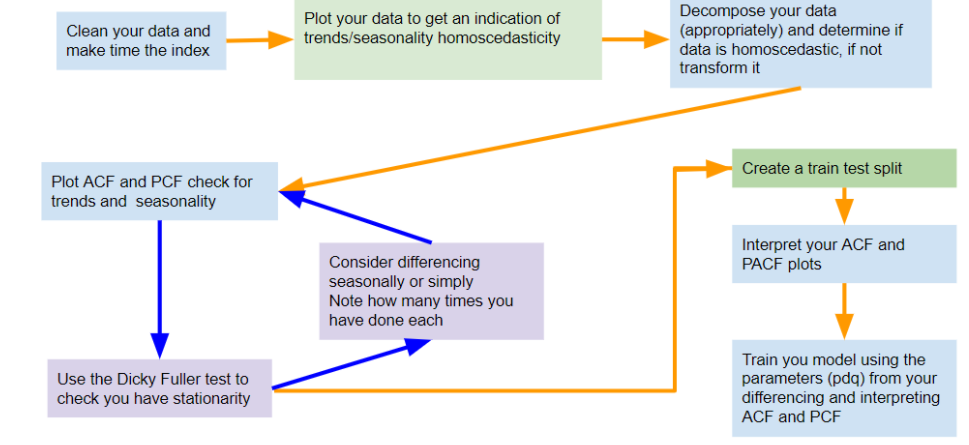

In [94]:
# let's get some data

path = 'data/gt_drone_racing.csv'
drone = pd.read_csv(path)


path2 = './data/euretail.csv'
retail = pd.read_csv(path2)

drone.head()
drone.columns=['Week','races']

## 1. Cleaning

In [95]:
drone.isnull().sum()

Week     0
races    0
dtype: int64

## 2. Set time as index 

In [96]:
#convert Date to datetime
drone['Week'] = pd.to_datetime(drone['Week'])

In [97]:
# standard change of index
drone.set_index('Week', inplace=True)

In [98]:
drone = drone.sort_index()
# we could set the frequency to business days as we have no weekend data!
# you can also use resample('B') to get the same effect
drone = drone.resample("W").pad()

drone.head()

,races
Week,
2014-07-13,7
2014-07-20,7
2014-07-27,7
2014-08-03,7
2014-08-10,7


In [99]:
retail.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4
0,1996,89.13,89.52,89.88,90.12
1,1997,89.19,89.78,90.03,90.38
2,1998,90.27,90.77,91.85,92.51
3,1999,92.21,92.52,93.62,94.15
4,2000,94.69,95.34,96.04,96.30


In [100]:
unpivoted = retail.melt(id_vars=['Year'], var_name='date', value_name='sales')
unpivoted

,Year,date,sales
0,1996,Qtr1,89.13
1,1997,Qtr1,89.19
2,1998,Qtr1,90.27
3,1999,Qtr1,92.21
4,2000,Qtr1,94.69
...,...,...,...
59,2007,Qtr4,102.10
60,2008,Qtr4,100.34
61,2009,Qtr4,97.44
62,2010,Qtr4,96.70


In [101]:
unpivoted['date2'] = unpivoted['Year'].apply(str) + unpivoted['date']
unpivoted.head()

# standard change of index
unpivoted.set_index('date2', inplace=True)


## 3. Plot your timeseries to see if it has a trend or seasonality

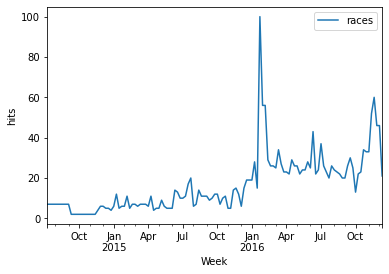

In [102]:
ax = drone.plot(y = 'races',use_index = True)
ax.set_xlabel("Week")
ax.set_ylabel("hits");

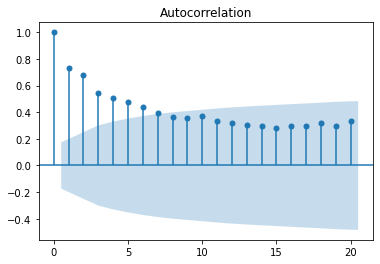

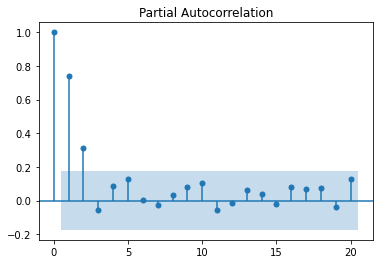

In [103]:
plot_acf(drone['races'].dropna(),lags=20);
plot_pacf(drone['races'].dropna(),lags = 20);

## 4. Decompose


REMEMBER if you don't have seasonality decompose by finding the MA and subtracting it from the data, OR by fitting a polynomial line and subtracting it this will gove you the residual.

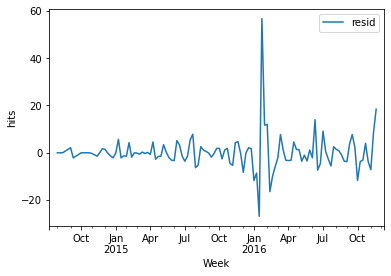

In [74]:
drone['trend'] = drone['races'].rolling(window=7, center=True).mean() # rolling mean for trend
# sadly lambda has to be used here 


drone['resid'] = drone['races'] - drone['trend']



ax = drone.plot(y = 'resid',use_index = True)
ax.set_xlabel("Week")
ax.set_ylabel("hits");

In [ ]:
# We probably wouldn't pursue this model much further as the 
# hetroscedacity is quite extreme, but you have seen how to decompose a non-seasonal 

## 5. Acheive stationarity

This step is the same, although you cannot seasonally difference!

## 6. Train test split

This step is identical

## 7. Interpret ACF and PACF to find (pdq) and (pdqs) terms

This step you skip straight to part 4 and you do not include the seasonal parameters (p,d,q,s)
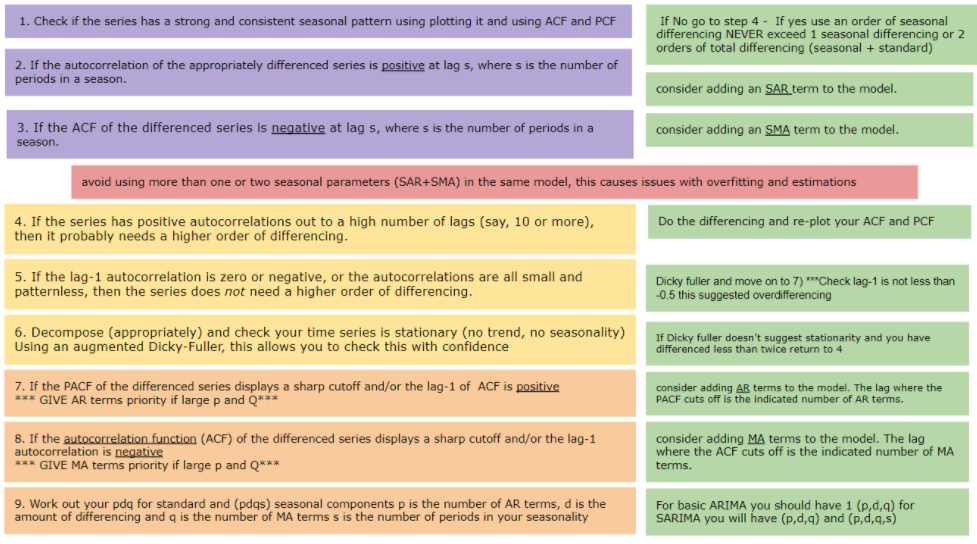

## 8. Build model

Use model = SARIMAX(train, order=(0,1,1)).fit() because there is no seasonal part to your model

## 9. Evaluate the performance

This step is identical